<a href="https://colab.research.google.com/github/RaoBurhan001/Deep_Learning/blob/main/Multi_Layer_Perceptron_using_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install tensorflow-datasets


In [26]:
import tensorflow as tf
from keras.datasets import mnist
import keras


In [10]:
(X_train , y_train) , (X_test,y_test) =mnist.load_data()

In [11]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


In [17]:

X_train= X_train.reshape(60000,784)
X_test= X_test.reshape(10000,784)

In [18]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


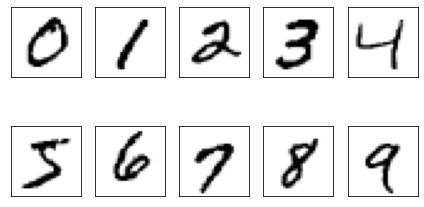

In [20]:

import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=2, ncols=5,
                       sharex=True, sharey=True)
ax = ax.flatten()
for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys')

ax[0].set_yticks([])

ax[0].set_xticks([])
plt.tight_layout()
plt.show()

In [24]:
import numpy as np

np.random.seed(123)
tf.random.set_seed(123)


In [28]:
from tensorflow.keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train)

print('First 3 labels: ', y_train[:3])
print('\nFirst 3 labels (one-hot):\n', y_train_one_hot[:3])

First 3 labels:  [5 0 4]

First 3 labels (one-hot):
 [[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


In [56]:
from keras.layers import Dense,Conv2D, Flatten,MaxPooling2D,Dropout
from keras.models import Sequential

#initialize model
model = Sequential()

#Initialize the input layer

model.add(Dense(units=50, activation='relu'  , kernel_initializer='glorot_uniform' ,bias_initializer='zeros' ,input_dim = X_train.shape[1]))

#Add a hidden layer

model.add(Dense(units=50, activation='relu'  , kernel_initializer='glorot_uniform' ,bias_initializer='zeros' ,input_dim =50))

#Add output layer

model.add(Dense(units=y_train_one_hot.shape[1], activation='softmax'  , kernel_initializer='glorot_uniform' ,bias_initializer='zeros' ,input_dim = 50))


#Add a optimizer

sgd_optimizer = tf.keras.optimizers.SGD(  lr=0.001, decay=1e-7, momentum=0.9)

#compile the model 

model.compile(
    optimizer='Adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [57]:
history = model.fit(X_train , y_train_one_hot , batch_size=64, epochs=50 , verbose=1 , validation_split=0.1)

Epoch 1/50
844/844 [==============================] - 3s 3ms/step - loss: 2.2108 - accuracy: 0.7378 - val_loss: 0.4786 - val_accuracy: 0.8745
Epoch 2/50
844/844 [==============================] - 2s 2ms/step - loss: 0.4799 - accuracy: 0.8739 - val_loss: 0.3254 - val_accuracy: 0.9107
Epoch 3/50
844/844 [==============================] - 2s 3ms/step - loss: 0.3605 - accuracy: 0.9041 - val_loss: 0.3001 - val_accuracy: 0.9297
Epoch 4/50
844/844 [==============================] - 2s 3ms/step - loss: 0.3189 - accuracy: 0.9149 - val_loss: 0.2662 - val_accuracy: 0.9343
Epoch 5/50
844/844 [==============================] - 2s 3ms/step - loss: 0.2798 - accuracy: 0.9248 - val_loss: 0.2445 - val_accuracy: 0.9363
Epoch 6/50
844/844 [==============================] - 2s 3ms/step - loss: 0.2517 - accuracy: 0.9317 - val_loss: 0.2111 - val_accuracy: 0.9455
Epoch 7/50
844/844 [==============================] - 2s 3ms/step - loss: 0.2331 - accuracy: 0.9364 - val_loss: 0.2190 - val_accuracy: 0.9437
Epoch 

In [43]:
y_pred = model.predict(X_train)
y_pred = np.round(y_pred).astype(int)
print('First 3 predictions: ', y_pred[:3])

First 3 predictions:  [[0 0 0 1 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


In [53]:
y_train_predict = model.predict(X_test[:10])
y_train_predict

array([[9.08072639e-09, 2.26642416e-09, 5.81985187e-05, 1.71867887e-05,
        2.81875074e-08, 1.55052840e-06, 1.18344202e-12, 9.99890447e-01,
        2.10881367e-07, 3.22870619e-05],
       [7.91285653e-03, 1.52247236e-03, 9.30401206e-01, 3.50981653e-02,
        8.64142748e-06, 1.67110120e-03, 2.86843060e-05, 2.16702875e-02,
        1.64692313e-03, 3.96223331e-05],
       [1.72519913e-06, 9.93682146e-01, 5.78788786e-05, 2.52701400e-04,
        2.35166735e-04, 1.07654545e-03, 5.54209168e-04, 6.65109954e-04,
        1.77731185e-04, 3.29681556e-03],
       [9.99574006e-01, 8.17563617e-09, 9.91046727e-06, 1.23448963e-05,
        2.15737737e-06, 2.74417282e-04, 2.82644191e-06, 1.02543025e-04,
        2.65915698e-08, 2.17645447e-05],
       [3.59415537e-07, 4.06615861e-08, 1.03563316e-05, 3.43923223e-09,
        9.92877185e-01, 2.87990861e-06, 9.70391557e-05, 2.57982429e-05,
        3.58876434e-07, 6.98597962e-03],
       [8.17372925e-09, 9.99306440e-01, 2.77986169e-06, 1.91124800e-05,
   

In [46]:
y_test[:10]

array([7, 2, 1, 0, 4, 1, 4, 9, 5, 9], dtype=uint8)

0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  """Entry point for launching an IPython kernel.
